In [65]:
#Alberto wrote this
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns   #visualisation
%matplotlib inline     
sns.set(color_codes=True)
#[....] for you to add

In [78]:
df_meta = pd.read_csv("Data/SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0).T
dff = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0).T
dffn = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T

df2_meta = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df2 = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0).T
df2f = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0).T
df2fn = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0).T

In [79]:
def extract_cell_name(x):
    y = x.split("_")
    return y[len(y)-2]

def get_cell_name(file_name):
    return extract_cell_name(file_name)

def convert_indexes_to_cell_names(df):
    df.index = [get_cell_name(x) for x in df.index]
    return df

def get_cell_hypo_or_norm(cell_name):
    return df_meta[df_meta["Cell name"]==cell_name]["Condition"].values[0]

def seperate_hypo_and_norm(df):
    df_hypo = df[df.index.map(lambda x: get_cell_hypo_or_norm(x)=="Hypo")]
    df_norm = df[df.index.map(lambda x: get_cell_hypo_or_norm(x)=="Norm")]
    return df_hypo, df_norm

def process_df(df):
    df = convert_indexes_to_cell_names(df)
    df_hypo, df_norm = seperate_hypo_and_norm(df)
    return df, df_hypo, df_norm

In [80]:
df, df_hypo, df_norm = process_df(df.copy())
dff, dff_hypo, dff_norm = process_df(dff.copy())
dffn, dffn_hypo, dffn_norm = process_df(dffn.copy())
df2, df2_hypo, df2_norm = process_df(df2.copy())
df2f, df2f_hypo, df2f_norm = process_df(df2f.copy())
df2fn, df2fn_hypo, df2fn_norm = process_df(df2fn.copy())

In [69]:
""" #no need to run this, it was only for plotting
#change Condition: set Hypo to 1 and Norm to 0
df_meta['Condition'] = df_meta['Condition'].replace(['Hypo'], 1) 
df_meta['Condition'] = df_meta['Condition'].replace(['Norm'], 0)
 """
#replace index with Cell name

df_meta.index = df_meta['Cell name']



In [70]:
df_meta

,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Cell name,,,,,,,,
S28,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S29,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S30,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S1,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S2,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
...,...,...,...,...,...,...,...,...
S359,MCF7,output.STAR.4,H5,Norm,72,S359,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S360,MCF7,output.STAR.4,H6,Norm,72,S360,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S379,MCF7,output.STAR.4,H7,Hypo,72,S379,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [71]:
df_meta.head(5)   


,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Cell name,,,,,,,,
S28,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S29,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S30,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S1,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
S2,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [72]:
df_meta.dtypes

Cell Line             object
Lane                  object
Pos                   object
Condition             object
Hours                  int64
Cell name             object
PreprocessingTag      object
ProcessingComments    object
dtype: object

In [73]:
#reading unfiltered and filtered data
""" df = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df))
print("First column: ", df.iloc[ : , 0])
dff = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df))
print("First column: ", df.iloc[ : , 0])
 """


' df = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\\ ",engine=\'python\',index_col=0)\nprint("Dataframe dimensions:", np.shape(df))\nprint("First column: ", df.iloc[ : , 0])\ndff = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt",delimiter="\\ ",engine=\'python\',index_col=0)\nprint("Dataframe dimensions:", np.shape(df))\nprint("First column: ", df.iloc[ : , 0])\n '

In [74]:
df.shape,dff.shape

((383, 22934), (313, 18945))

In [81]:
dff.columns
#how to change the columns to the cell names?

Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=18945)

In [ ]:
gene_symbls = df.index
print("Dataframe indexes: ", gene_symbls)

Dataframe indexes:  Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=22934)


<p><strong><em>Exploratory data analysis</em></strong> include a broad range of possible tasks:</p>
<ul>
<li>check how large are the files</li>
<li>are the data types all numeric</li>
<li>what can you observe by looking at the data (maybe use some plots to explain)</li>
</ul>



Run PCA to understand which columns explain the most variance of the data  

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca.fit(df)
pca.explained_variance_ratio_


array([0.7223147 , 0.12182485, 0.02694344, 0.02222061, 0.01698466])

In [ ]:
X = pca.transform(df)

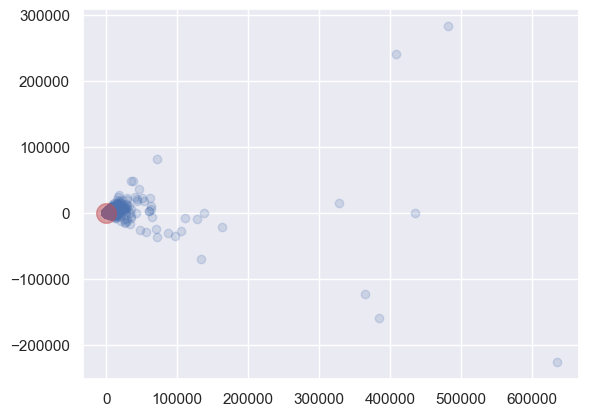

In [ ]:
#plot with different color depending on type  
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter([X[10][0]], [X[10][1]], s=[200], c=["r"], alpha=0.5)


In [76]:
#difference between df and dff
#I have df, dff, dffn with _norm or _hypo

dff.columns, df.columns
#columns removed in dff
df.columns.difference(dff.columns)

Index(['"A1CF"', '"A2M"', '"A2ML1"', '"A2MP1"', '"AANAT"', '"ABCA13"',
       '"ABCA4"', '"ABCA8"', '"ABCB11"', '"ABCC13"',
       ...
       '"ZNF716"', '"ZNF725P"', '"ZNF727"', '"ZNF826P"', '"ZNF831"',
       '"ZNF90P1"', '"ZNHIT1P1"', '"ZNRF3-AS1"', '"ZSCAN1"', '"ZSCAN5B"'],
      dtype='object', length=3989)

In [77]:
dff.columns.difference(df.columns)

Index([], dtype='object')